# UJM - Master DSC/MLDM - Deep Learning - TP2a - Autoencoders

# Part . Autoencoder

## 1.1 Feed-forward Autoencoder

We write a quick feed-forward autoencoder mapping from images of size 728 to 32, then decode back to size 728

In [32]:
from __future__ import absolute_import, division, print_function
%matplotlib inline

from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, MaxPooling2D, Lambda
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import ELU, PReLU, LeakyReLU, Conv2D, UpSampling2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import keras.losses as Losses
#import keras.backend as K

import random
import matplotlib.pyplot as plt
import sys
import numpy as np


In [33]:
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
#Note above we used the binary_categorical_crossentropy, you could also use the mean_squared_error,
#in that case you could also replace the sigmoid activation of the last layer by a ReLu/Linear activation

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

In [35]:
def print_imgs(X):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 2))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(1, n, i + 1)
        plt.imshow(X[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

**Train the Autoencoder**

original images:


<Figure size 2000x200 with 0 Axes>

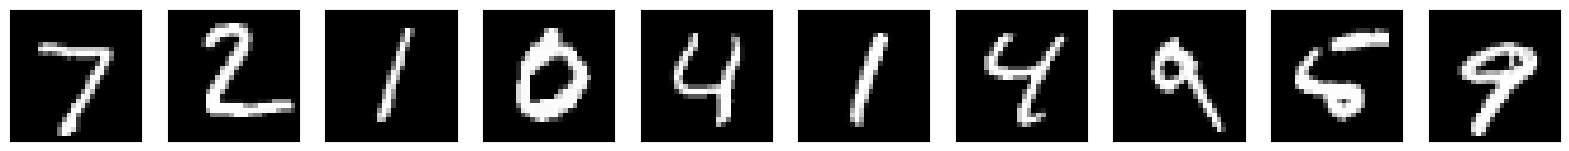

Reconstruction error:

[0.24830761551856995, 0.15514732897281647]


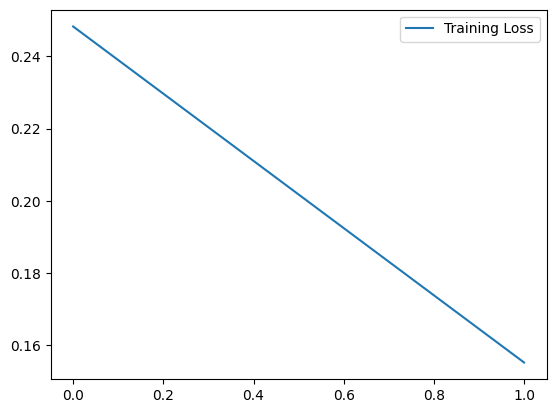

decoded images at epoch  2 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


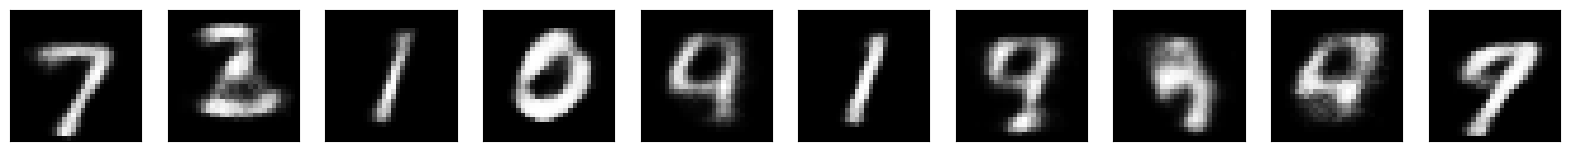

Corresponding mean square error: 

img  0   0.012235406
img  1   0.043358482
img  2   0.0050900737
img  3   0.019196637
img  4   0.023726445
img  5   0.004492927
img  6   0.043351255
img  7   0.045330364
img  8   0.06467831
img  9   0.022598838
Reconstruction error:

[0.1380065381526947, 0.12943391501903534]


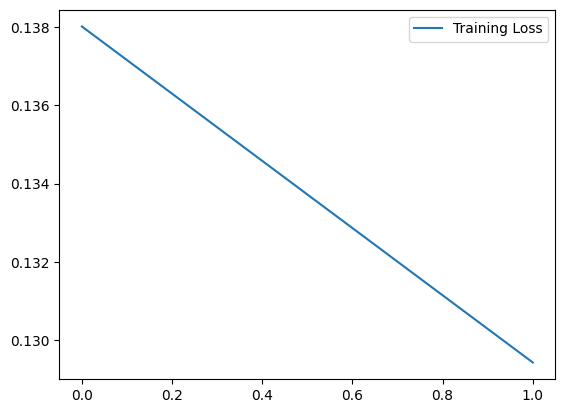

decoded images at epoch  4 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


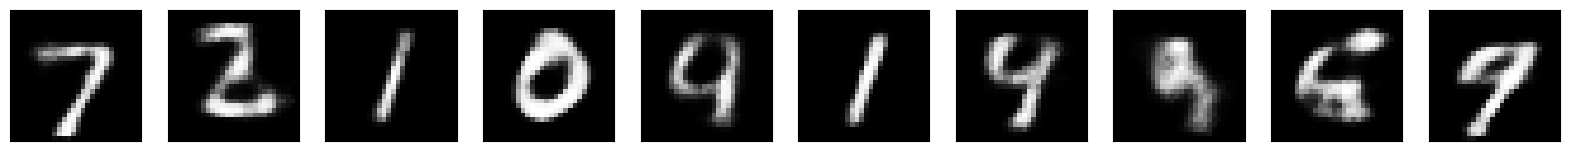

Corresponding mean square error: 

img  0   0.010116025
img  1   0.03932547
img  2   0.004246737
img  3   0.01295915
img  4   0.018539002
img  5   0.0027356476
img  6   0.027214654
img  7   0.032700554
img  8   0.044840515
img  9   0.02087832


In [36]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])

for i in range(2):
    history=autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    print('Reconstruction error:\n')
    print(history.history['loss'])
    plt.plot(history.history["loss"], label="Training Loss")
    plt.legend()
    plt.show()
    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*2 + 2, ':')
    decoded_imgs = autoencoder.predict(x_test[:10])
    print_imgs(decoded_imgs)
    #We compute the reconstruction error for each test image
    print('Corresponding mean square error: \n')
    for i in range(10):
        mse = Losses.MeanSquaredError()
        print('img ',i,' ',mse(decoded_imgs[i],x_test[i]).numpy())



### Super encoding
In this case we reduce the encoded dimension to 2.

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            66 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 784)            │       101,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,130 (820.82 KB)

 Trainable params: 210,130 (820.82 KB)

 Non-trainable params: 0 (0.00 B)

original images:


<Figure size 2000x200 with 0 Axes>

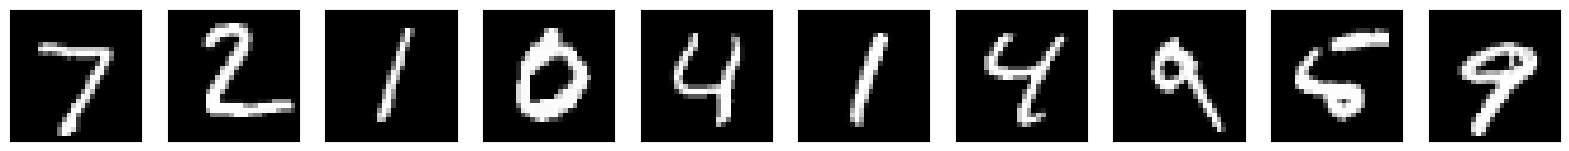

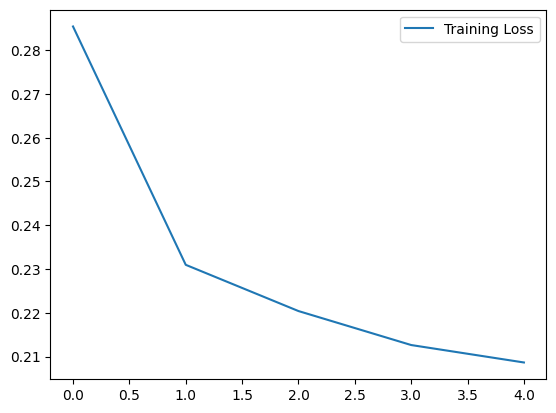

decoded images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


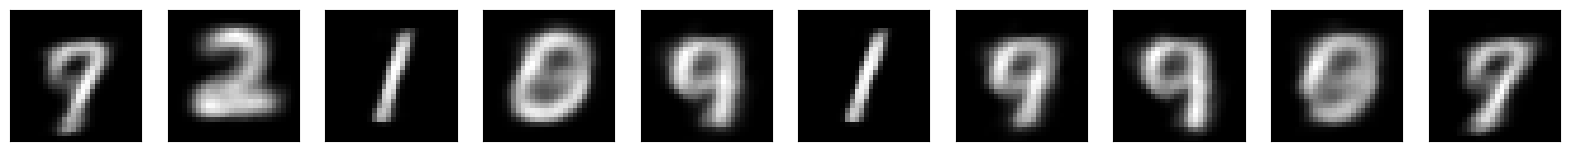

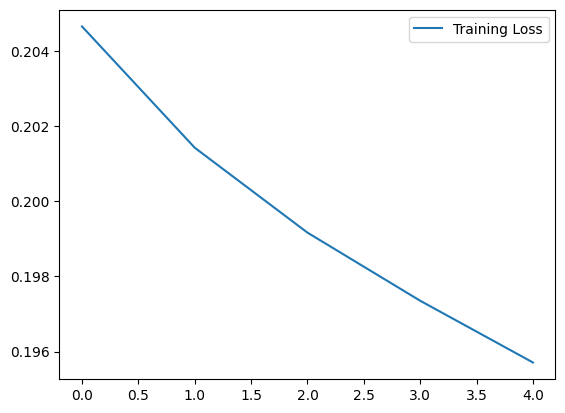

decoded images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


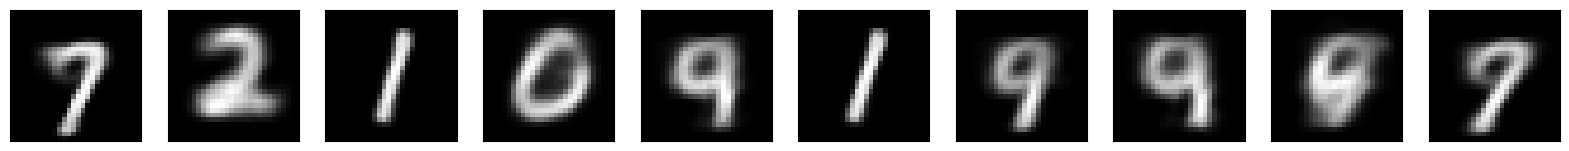

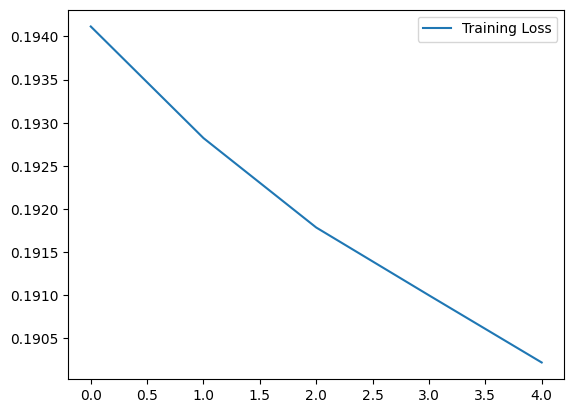

decoded images at epoch  15 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


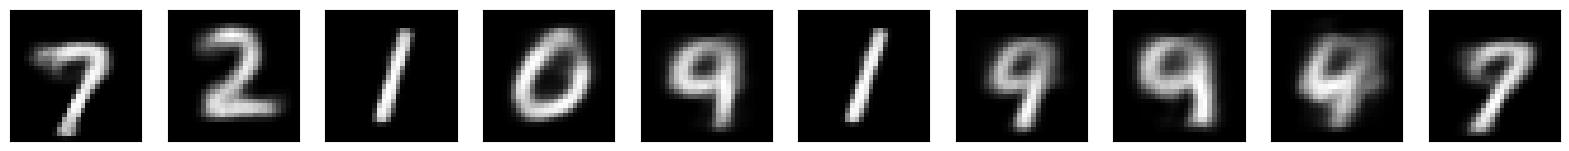

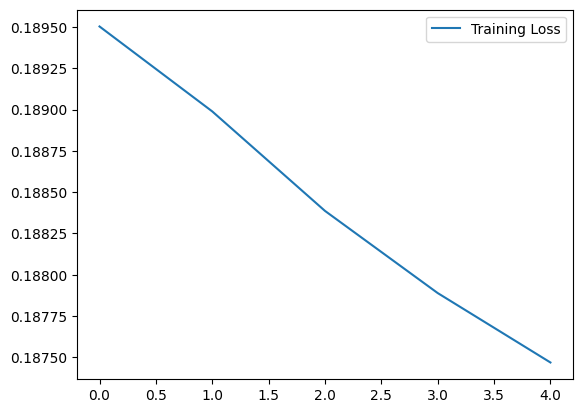

decoded images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


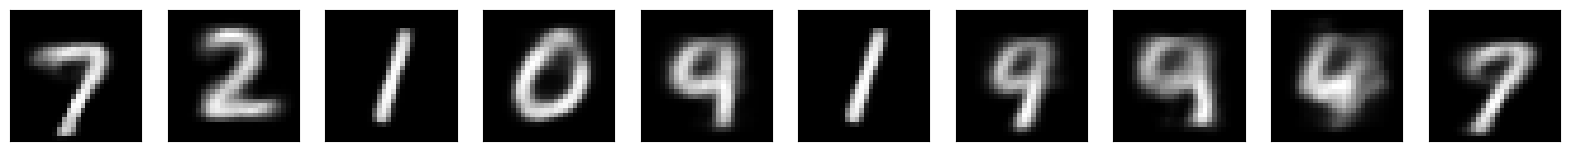

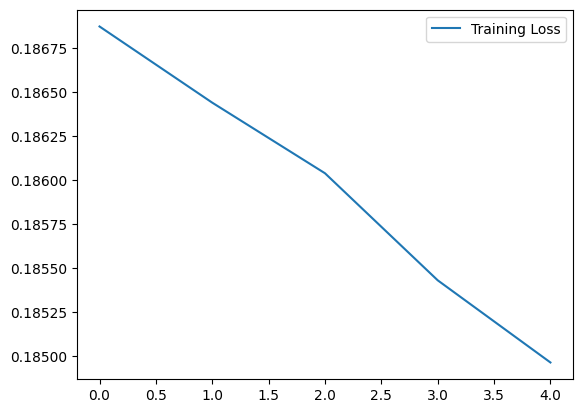

decoded images at epoch  25 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


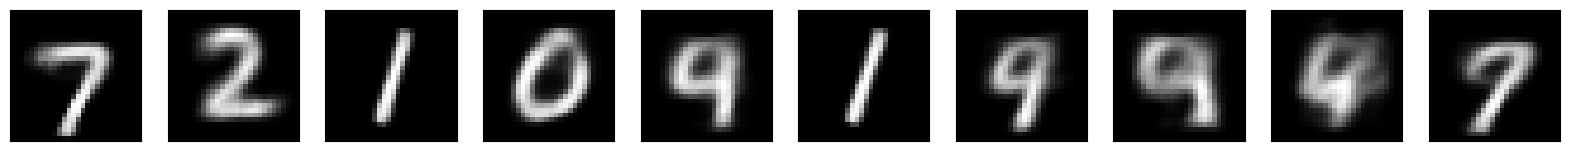

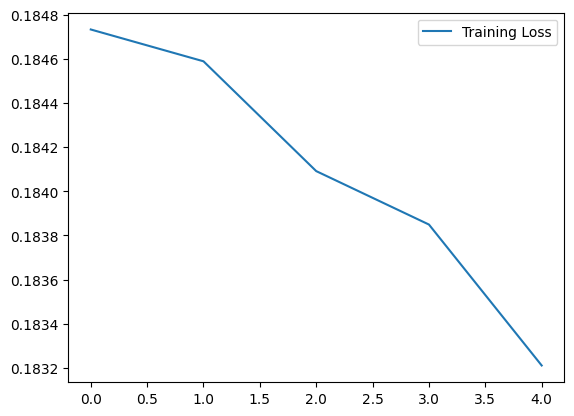

decoded images at epoch  30 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


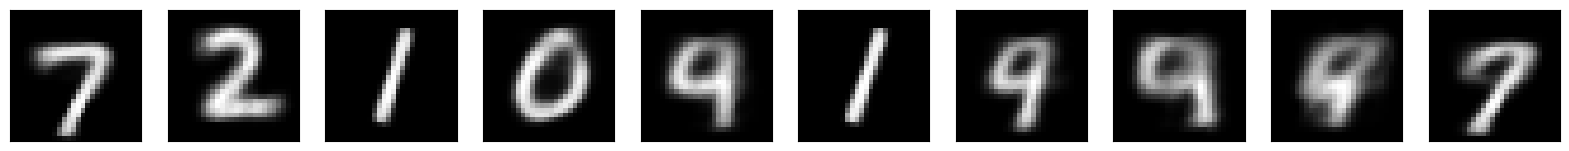

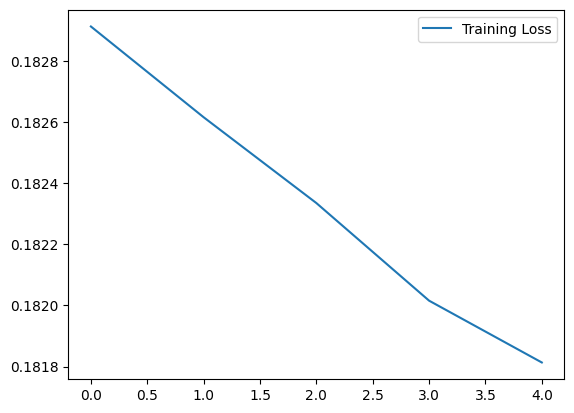

decoded images at epoch  35 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


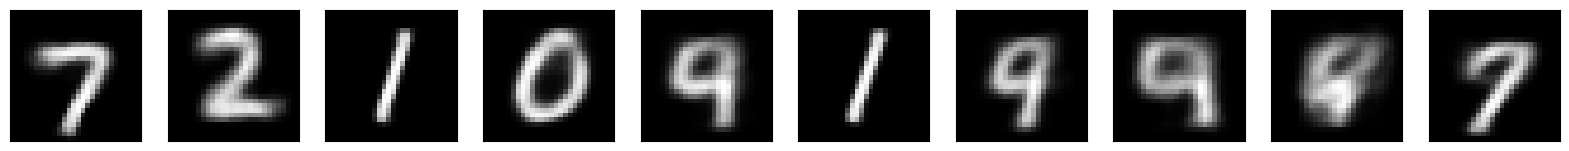

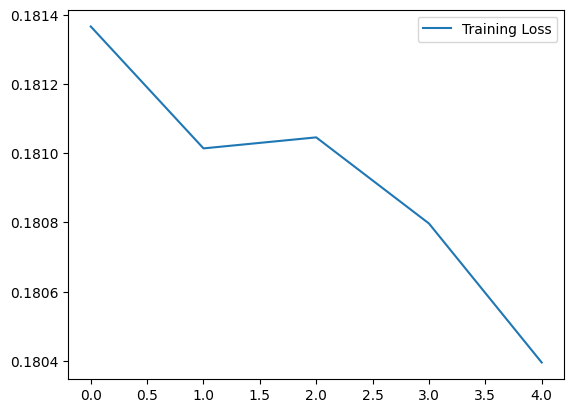

decoded images at epoch  40 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


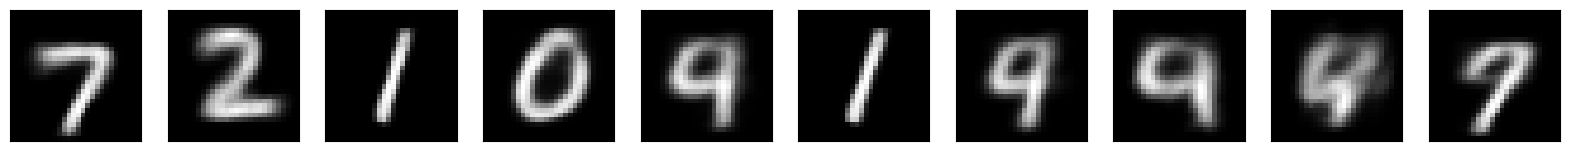

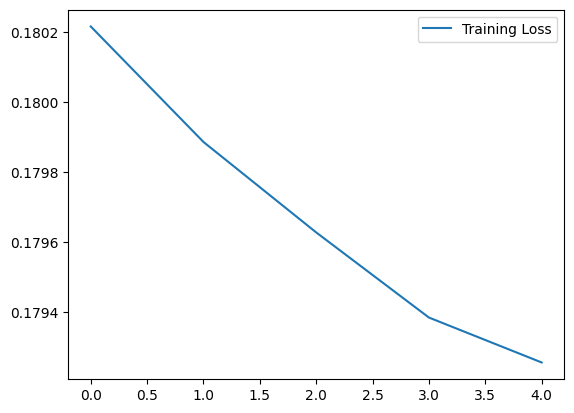

decoded images at epoch  45 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


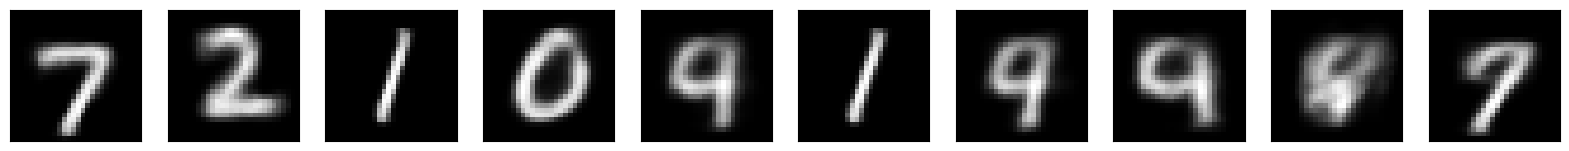

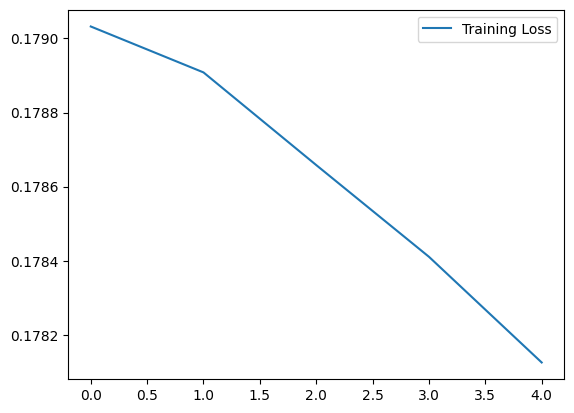

decoded images at epoch  50 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


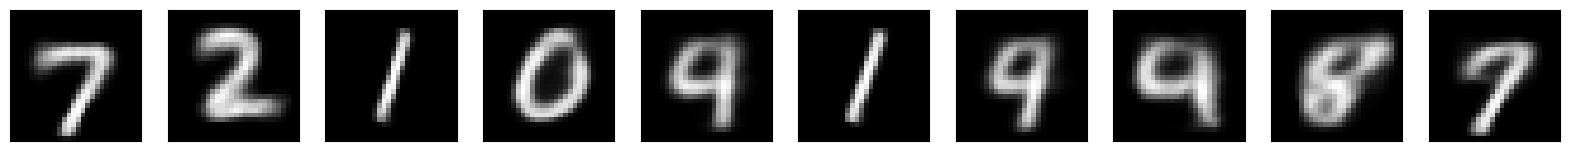

In [37]:
input_img = Input(shape=(28,28,1,))
flat = Flatten()(input_img)
encoded = Dense(128, activation='relu')(flat)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoded = Reshape(target_shape = (28,28,1,))(decoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])

for i in range(10):
    history=autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    plt.plot(history.history["loss"], label="Training Loss")
    plt.legend()
    plt.show()

    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*5 + 5, ':')
    decoded_imgs = autoencoder.predict(x_test[:n])
    print_imgs(decoded_imgs)

## 1.2 Convolutional autoencoder

### Exercise.  
Write code for a convolutional autoencoder and see whether the performance is improved

In [38]:
from tensorflow.keras.layers import UpSampling2D

input_img = Input(shape=(28, 28, 1))

enc = Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
enc = MaxPooling2D((2, 2), padding="same")(enc)
enc = Conv2D(8, (3, 3), activation="relu", padding="same")(enc)
enc = MaxPooling2D((2, 2), padding="same")(enc)
enc = Conv2D(8, (3, 3), activation="relu", padding="same")(enc)
enc = MaxPooling2D((2, 2), padding="same")(enc)

dec = Conv2D(8, (3, 3), activation='relu', padding="same")(enc)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(8, (3, 3), activation='relu', padding="same")(dec)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(16, (3, 3), activation='relu')(dec)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec)

# Autoencoder
conv_autoencoder = Model(input_img, dec)
conv_autoencoder.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
conv_autoencoder.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_18 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_19 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_20 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_51 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

original images:


<Figure size 2000x200 with 0 Axes>

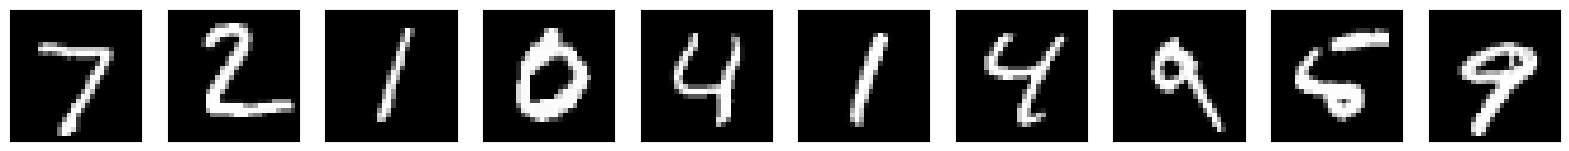

decoded images at epoch  2 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


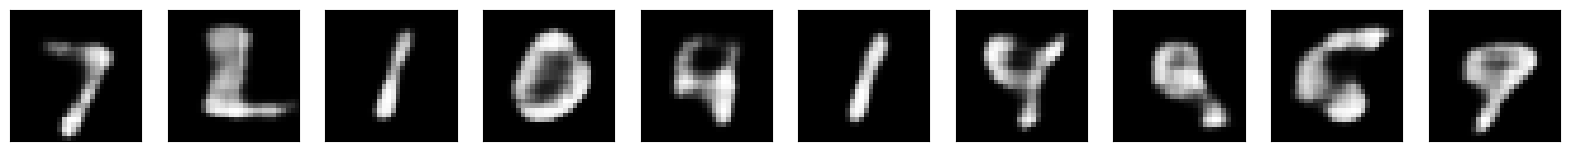

decoded images at epoch  4 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


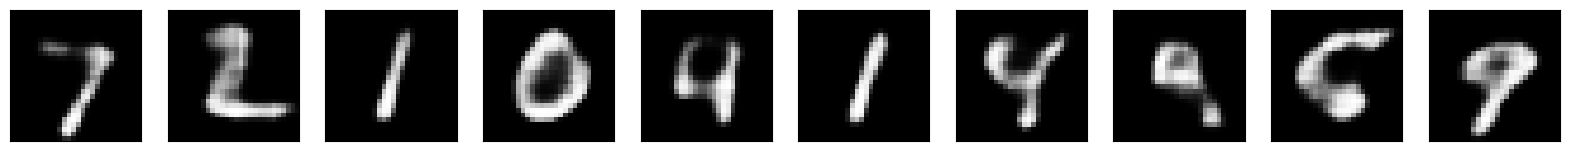

decoded images at epoch  6 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


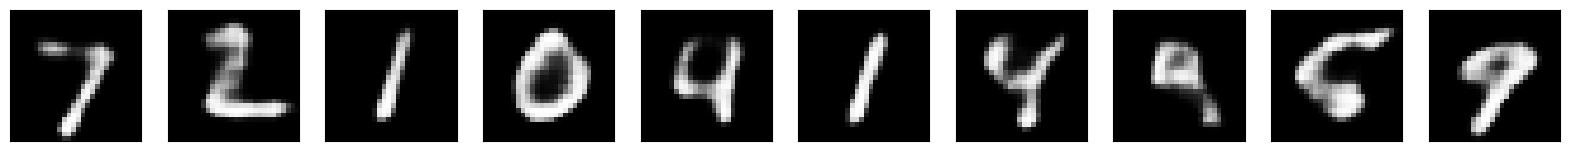

decoded images at epoch  8 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


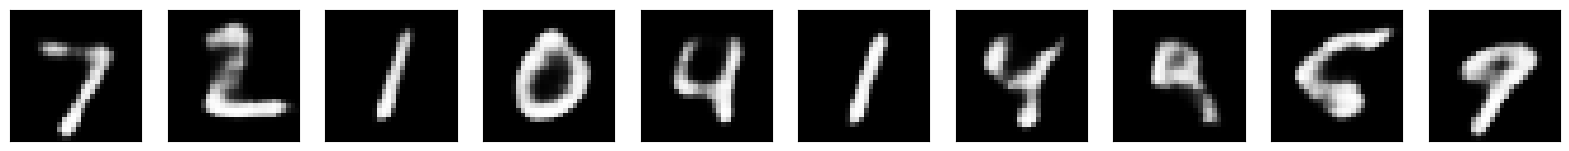

decoded images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


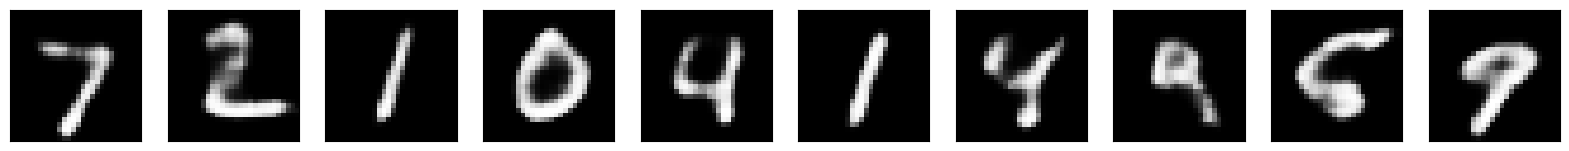

decoded images at epoch  12 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


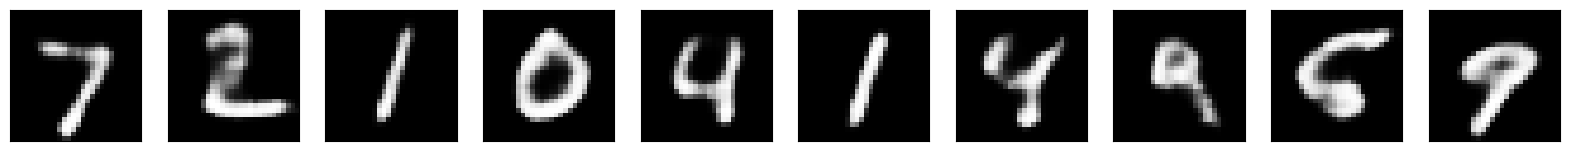

decoded images at epoch  14 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


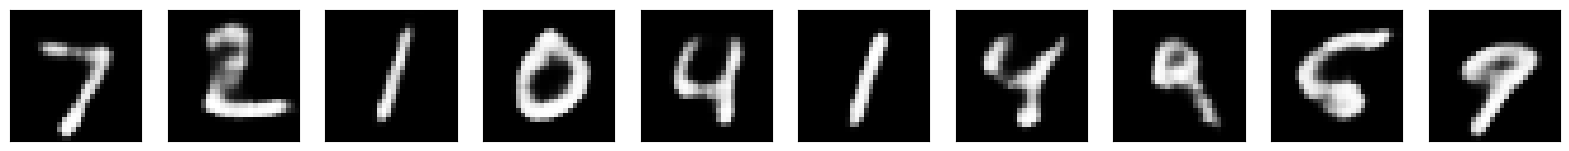

decoded images at epoch  16 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


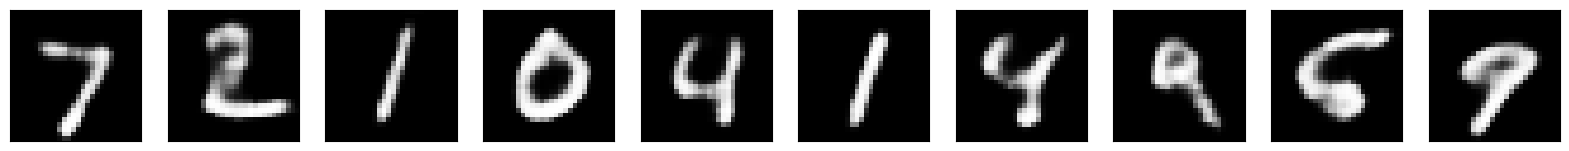

decoded images at epoch  18 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


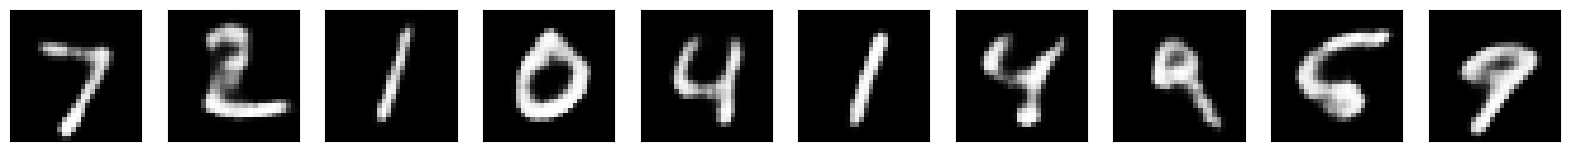

decoded images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


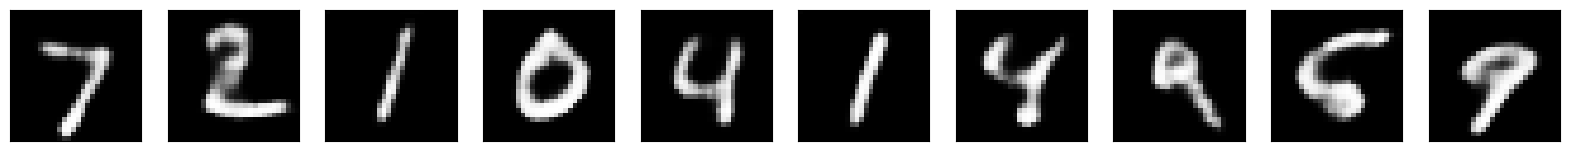

In [39]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:n])

for i in range(10):
    conv_autoencoder.fit(x_train, x_train,
                epochs=2,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*2 + 2, ':')
    decoded_imgs = conv_autoencoder.predict(x_test[:n])
    print_imgs(decoded_imgs)

## 1.3 Application to image denoising

We first create some noisy images

Original images in test


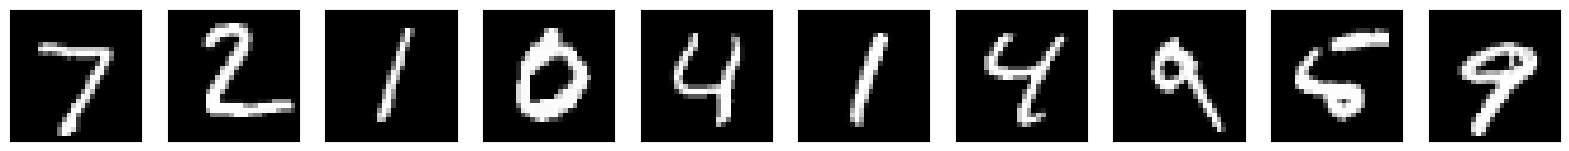

Corresponding noisy images


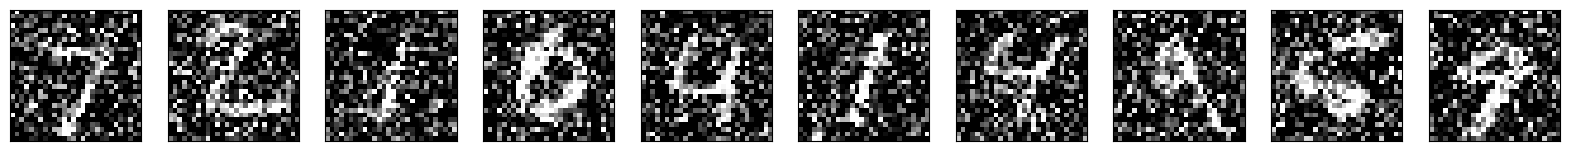

In [40]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print('Original images in test')
print_imgs(x_test[:10])
print('Corresponding noisy images')
print_imgs(x_test_noisy[:10])

And build a convolutional autoencoder

In [41]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

enc = Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
enc = MaxPooling2D((2, 2), padding="same")(enc)
enc = Conv2D(8, (3, 3), activation="relu", padding="same")(enc)
enc = MaxPooling2D((2, 2), padding="same")(enc)
enc = Conv2D(8, (3, 3), activation="relu", padding="same")(enc)
enc = MaxPooling2D((2, 2), padding="same")(enc)

dec = Conv2D(8, (3, 3), activation='relu', padding="same")(enc)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(8, (3, 3), activation='relu', padding="same")(dec)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(16, (3, 3), activation='relu')(dec)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(dec)

# Autoencoder
conv_autoencoder2 = Model(input_img, dec)
conv_autoencoder2.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
conv_autoencoder2.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_52 (Conv2D)              │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_53 (Conv2D)              │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_54 (Conv2D)              │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_21 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_22 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_23 (UpSampling2D) │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_58 (Conv2D)              │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

Suppose that we have only 1000 available pairs of noisy-clean images to train.

Test images


<Figure size 2000x200 with 0 Axes>

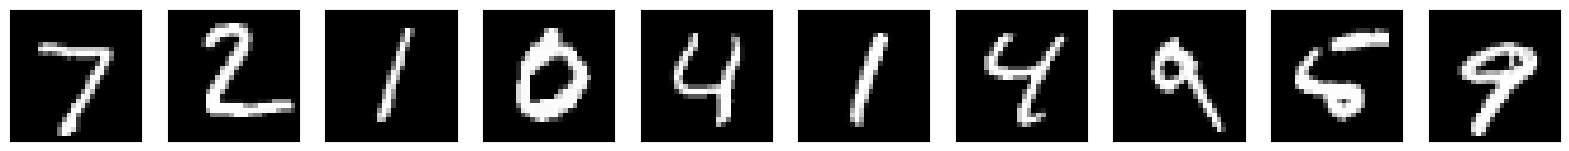

Noisy Test images


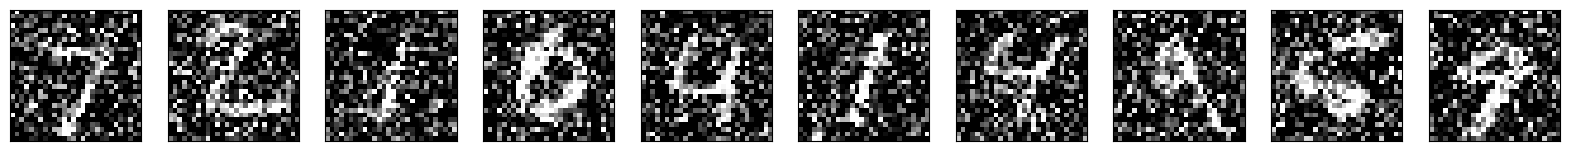

###

decoded test images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


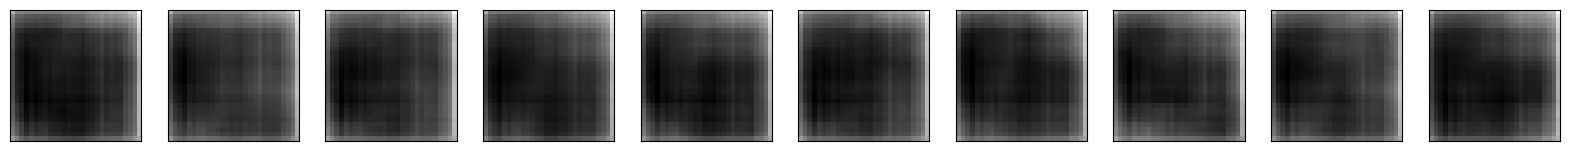

decoded noisy test images at epoch  5 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


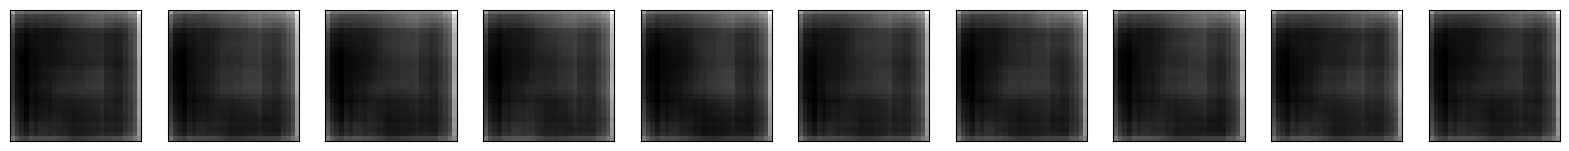

###

###

decoded test images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


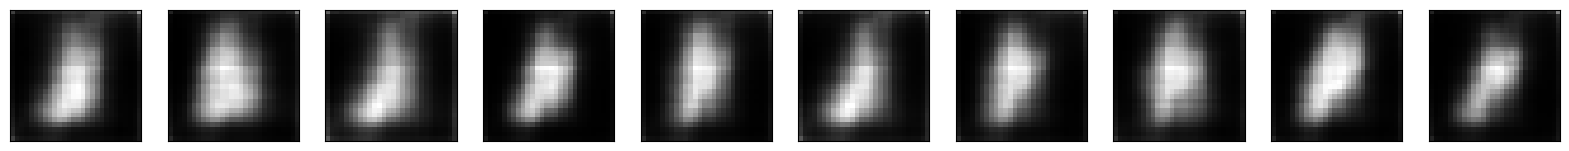

decoded noisy test images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


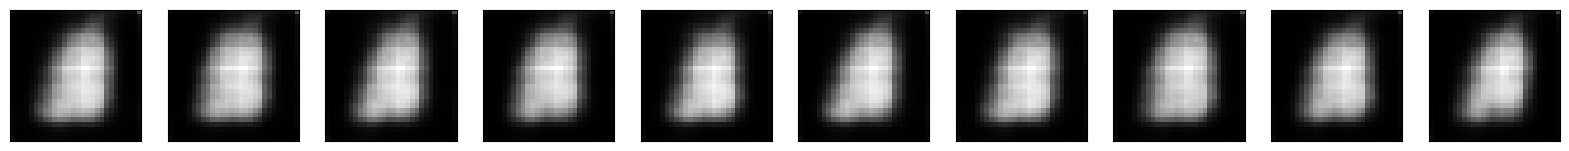

###

###

decoded test images at epoch  15 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


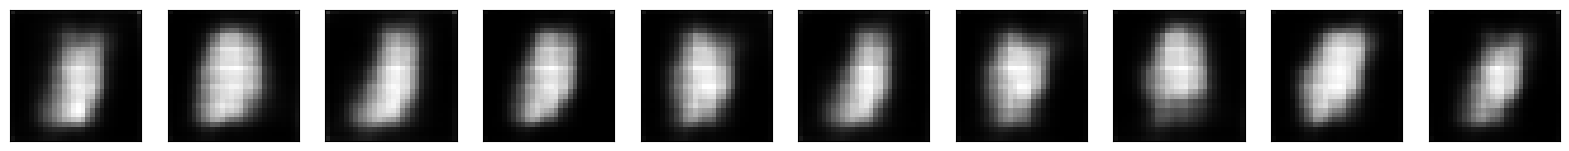

decoded noisy test images at epoch  15 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


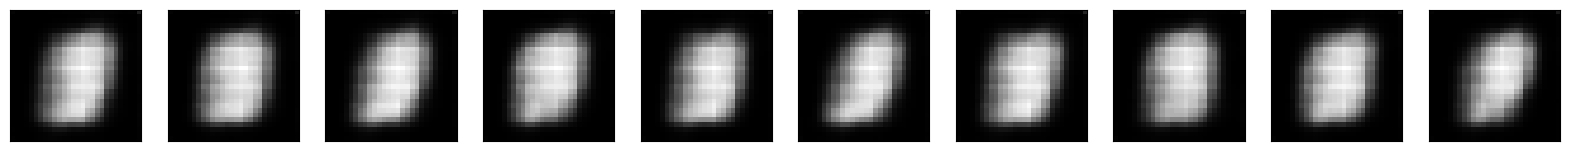

###

###

decoded test images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


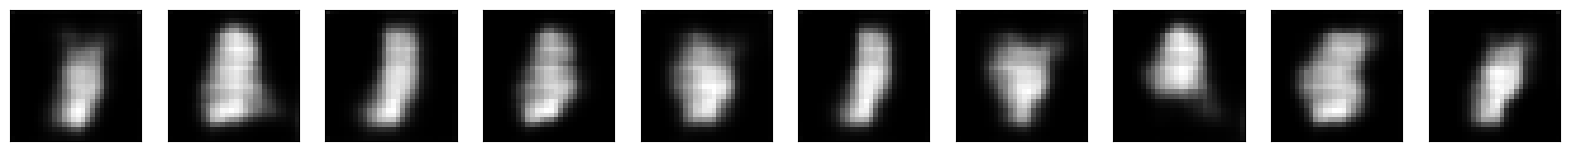

decoded noisy test images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


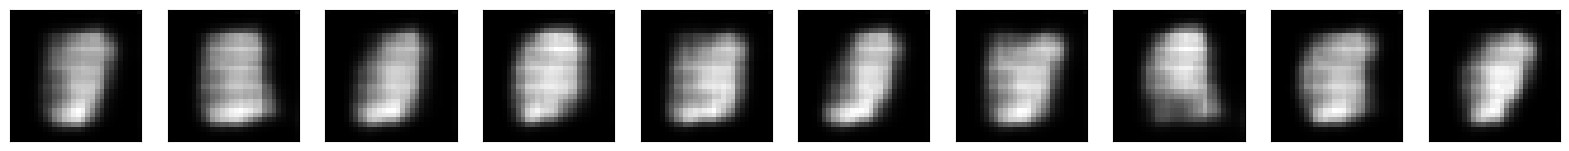

###

###

decoded test images at epoch  25 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


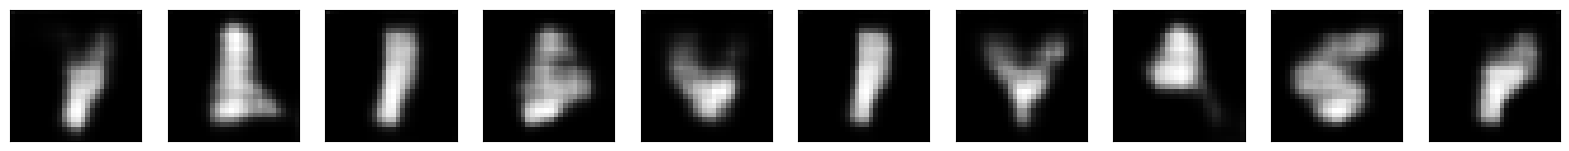

decoded noisy test images at epoch  25 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


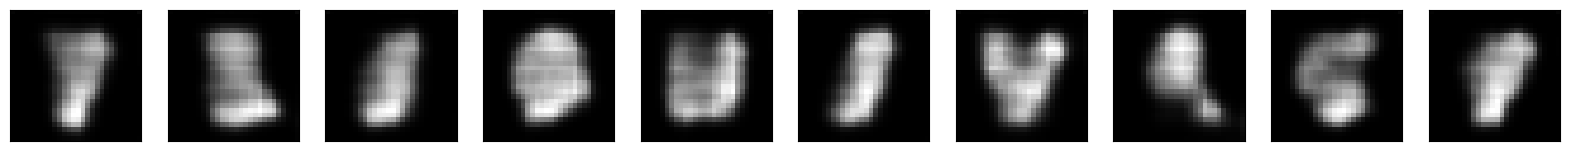

###

###

decoded test images at epoch  30 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


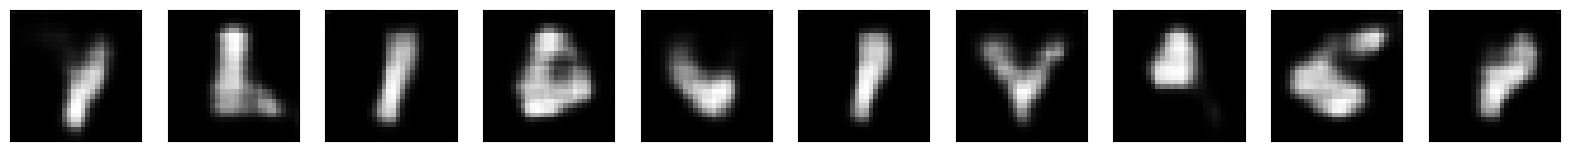

decoded noisy test images at epoch  30 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


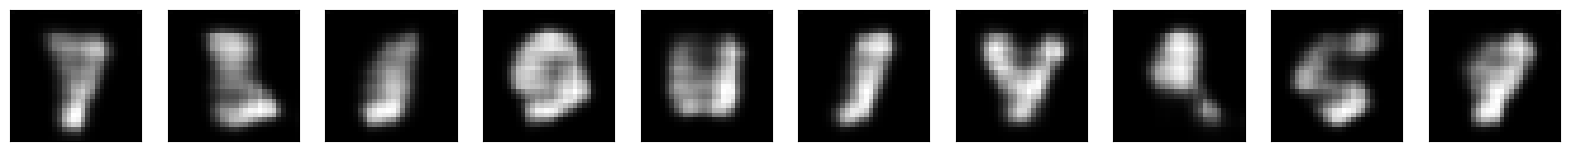

###

###

decoded test images at epoch  35 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


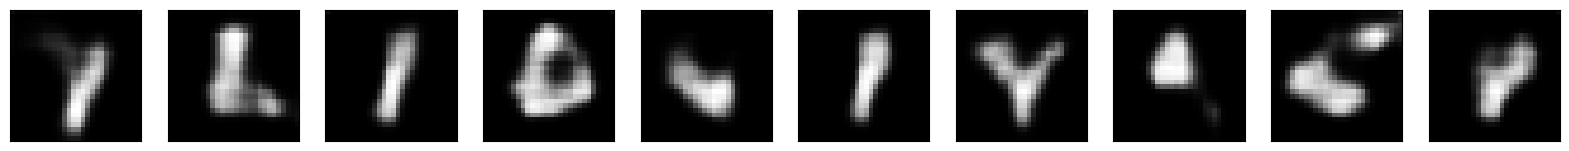

decoded noisy test images at epoch  35 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


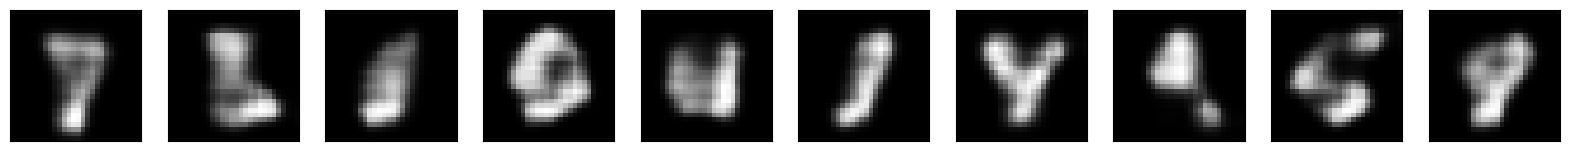

###

###

decoded test images at epoch  40 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


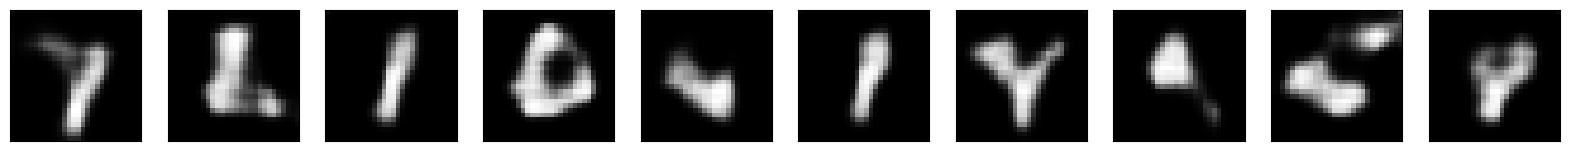

decoded noisy test images at epoch  40 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


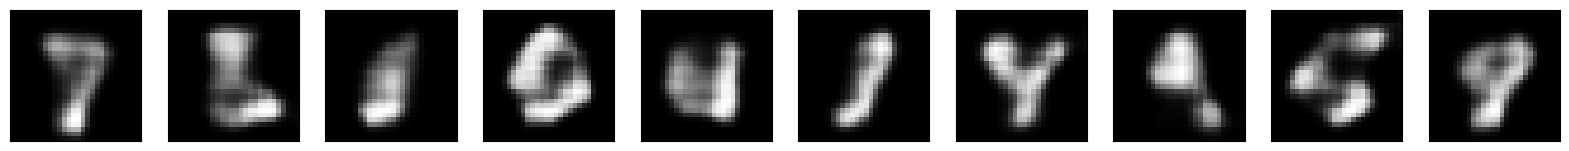

###

###

decoded test images at epoch  45 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


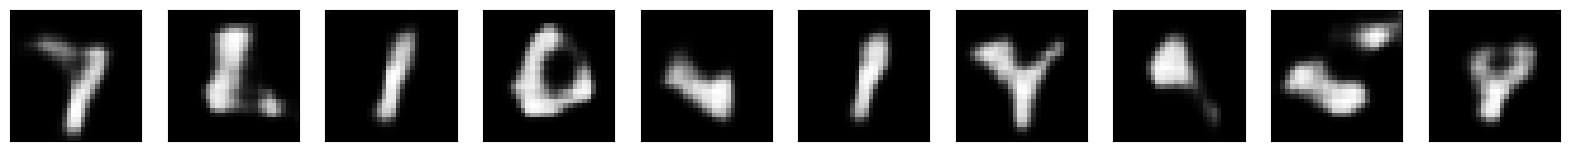

decoded noisy test images at epoch  45 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


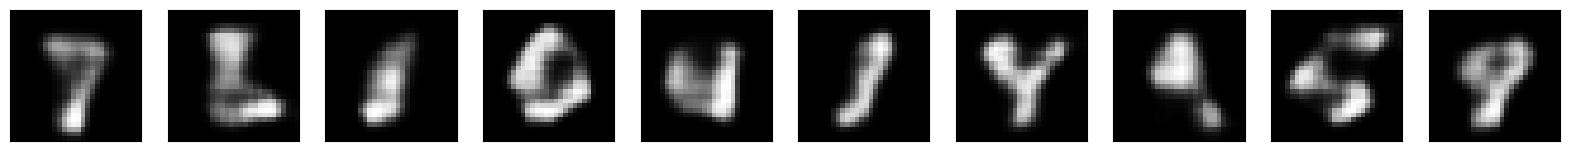

###

###

decoded test images at epoch  50 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


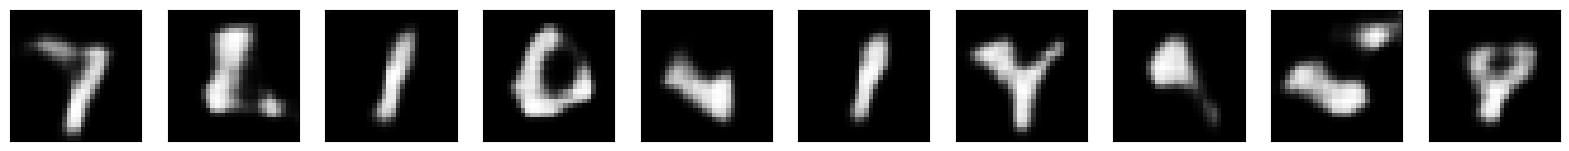

decoded noisy test images at epoch  50 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


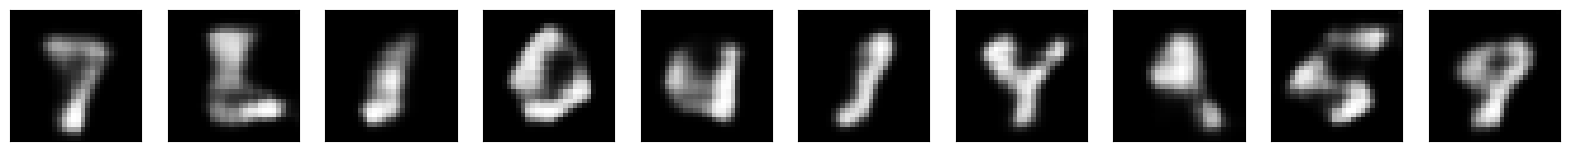

###



In [42]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 2))
print('Test images')
print_imgs(x_test[:10])
print('Noisy Test images')

print_imgs(x_test_noisy[:10])

for i in range(10):
    conv_autoencoder2.fit(x_train_noisy[:1000], x_train[:1000],
                epochs=10,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    # encode and decode some digits
    # note that we take them from the *test* set
    print('###\n')
    print('decoded test images at epoch ', i*5 + 5, ':')
    decoded_imgs = conv_autoencoder2.predict(x_test[:10])
    print_imgs(decoded_imgs)
    print('decoded noisy test images at epoch ', i*5 + 5, ':')
    decoded_imgs2 = conv_autoencoder2.predict(x_test_noisy[:10])
    print_imgs(decoded_imgs2)
    print('###\n')

## 1.4. Autoencoder with CIFAR-10

### Exercise 4.
Build your Autoencoder with CIFAR-10 and try to denoise CIFAR-10 images

In [43]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [44]:
x_train.shape

(50000, 32, 32, 3)

In [45]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

original images:


<Figure size 2000x200 with 0 Axes>

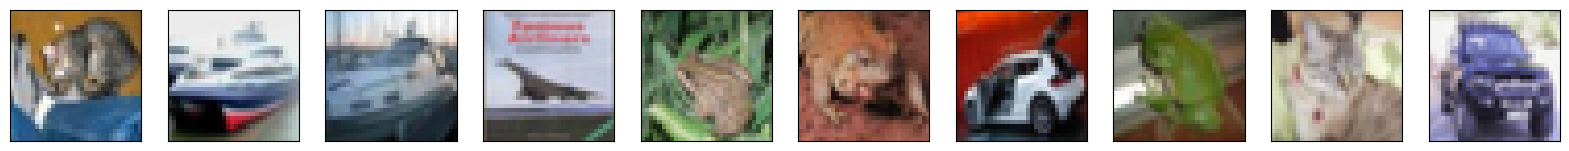

In [46]:
def print_imgs(X):
    n = 10  # how many digits we will display
    plt.figure(figsize=(20, 2))
    for i in range(n):
        # display reconstruction
        ax = plt.subplot(1, n, i + 1)
        # Handle both grayscale and RGB images
        img = X[i]
        if len(img.shape) == 3 and img.shape[2] == 3:
            # RGB image (CIFAR-10): shape is (32, 32, 3)
            plt.imshow(img)
        elif len(img.shape) == 3 and img.shape[2] == 1:
            # Grayscale with channel dimension: shape is (28, 28, 1) or (32, 32, 1)
            plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap='gray')
        else:
            # Grayscale without channel dimension: shape is (28, 28) or (32, 32)
            plt.imshow(img, cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

plt.figure(figsize=(20, 2))
print('original images:')
print_imgs(x_test[:10])

In [54]:
input_img = Input(shape=(32, 32, 3))

enc = Conv2D(16, (3, 3), activation="relu", padding="same")(input_img)
enc = MaxPooling2D((2, 2), padding="same")(enc)
enc = Conv2D(8, (3, 3), activation="relu", padding="same")(enc)
enc = MaxPooling2D((2, 2), padding="same")(enc)
enc = Conv2D(8, (3, 3), activation="relu", padding="same")(enc)
enc = MaxPooling2D((2, 2), padding="same")(enc)

dec = Conv2D(8, (3, 3), activation='relu', padding="same")(enc)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(8, (3, 3), activation='relu', padding="same")(dec)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(16, (3, 3), activation='relu', padding='same')(dec)
dec = UpSampling2D((2, 2))(dec)
dec = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(dec)

# Autoencoder
conv_autoencoder3 = Model(input_img, dec)
conv_autoencoder3.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
conv_autoencoder3.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 16, 16, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 4, 4, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_33 (UpSampling2D) │ (None, 8, 8, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 8, 8, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_34 (UpSampling2D) │ (None, 16, 16, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 16, 16, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_35 (UpSampling2D) │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 32, 32, 3)      │           435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,963 (19.39 KB)

 Trainable params: 4,963 (19.39 KB)

 Non-trainable params: 0 (0.00 B)

decoded images at epoch  2 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


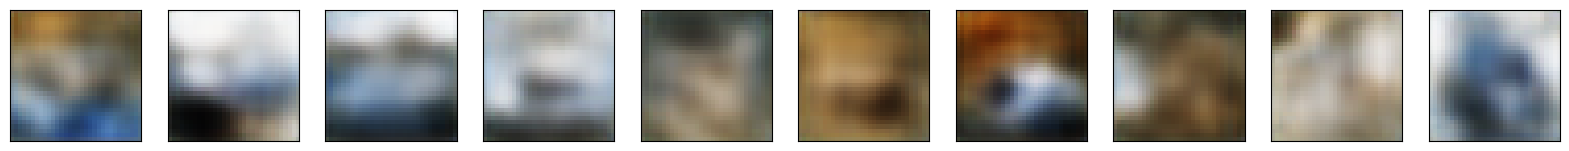

decoded images at epoch  4 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


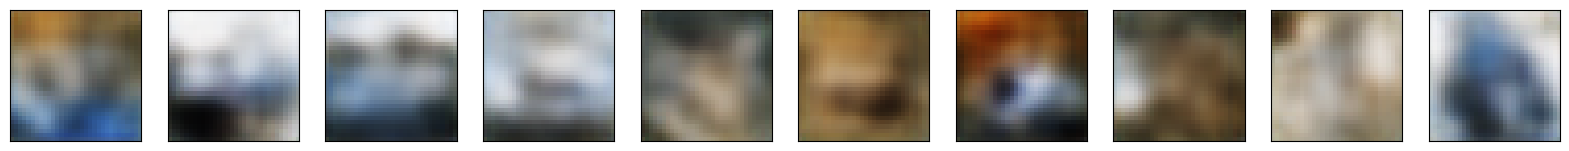

decoded images at epoch  6 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


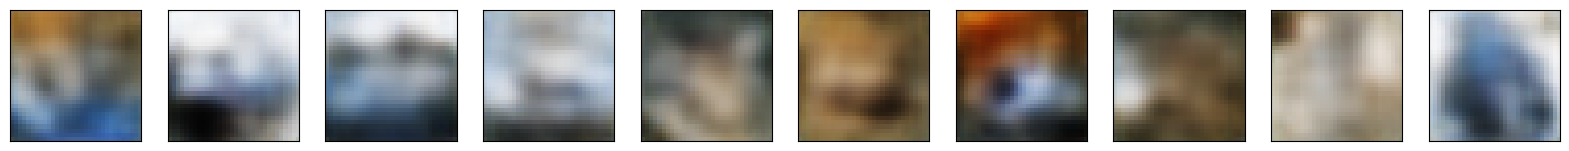

decoded images at epoch  8 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


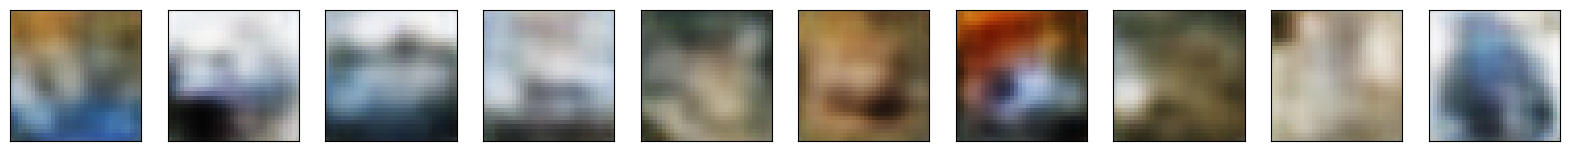

decoded images at epoch  10 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


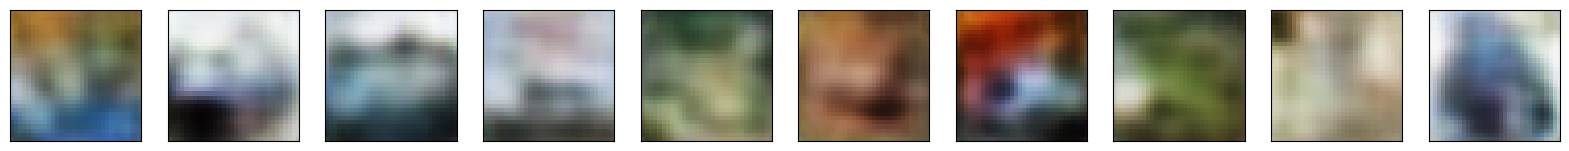

decoded images at epoch  12 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


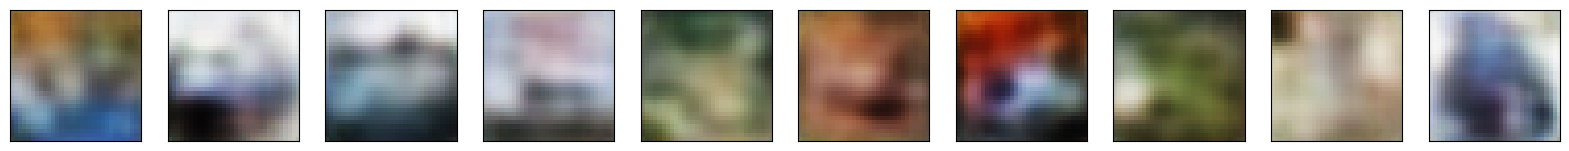

decoded images at epoch  14 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


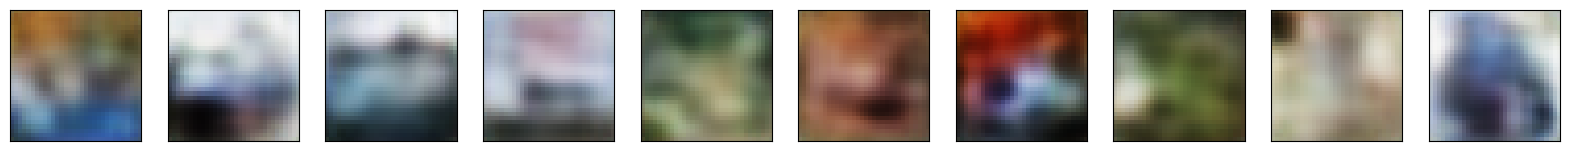

decoded images at epoch  16 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


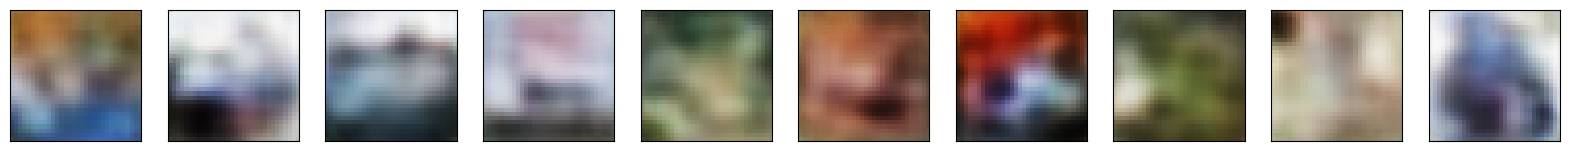

decoded images at epoch  18 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


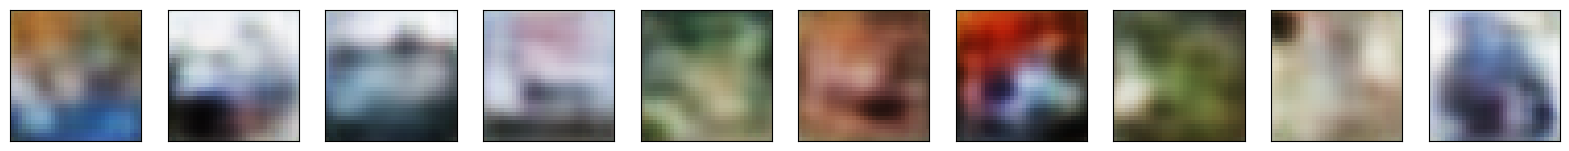

decoded images at epoch  20 :
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


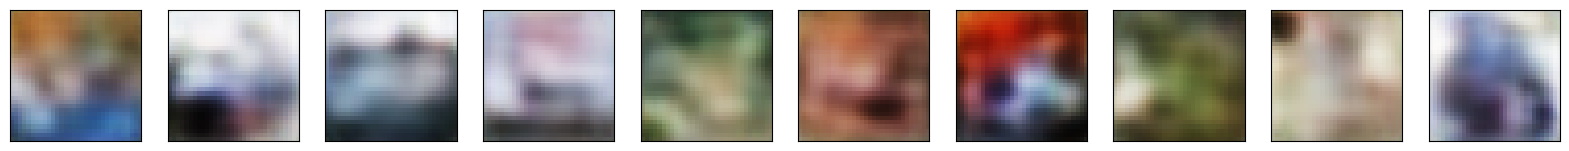

In [55]:
for i in range(10):
    conv_autoencoder3.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                verbose = 0)

    # encode and decode some digits
    # note that we take them from the *test* set
    print('decoded images at epoch ', i*2 + 2, ':')
    decoded_imgs = conv_autoencoder3.predict(x_test[:n])
    print_imgs(decoded_imgs)

## 2. Translate this notebook to pytorch

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')


## 2.1 Feed-forward Autoencoder 

In [ ]:
class FeedForwardAutoencoder(nn.Module):
    def __init__(self):
        super(FeedForwardAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
            nn.Unflatten(1, (28, 28, 1))
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

x_train = train_dataset.data.numpy().astype('float32') / 255.0
x_test = test_dataset.data.numpy().astype('float32') / 255.0
x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

x_train_tensor = torch.FloatTensor(x_train).permute(0, 3, 1, 2)  # (N, H, W, C) -> (N, C, H, W)
x_test_tensor = torch.FloatTensor(x_test).permute(0, 3, 1, 2)

train_loader = DataLoader(TensorDataset(x_train_tensor, x_train_tensor), batch_size=256, shuffle=True)
test_loader = DataLoader(TensorDataset(x_test_tensor, x_test_tensor), batch_size=256, shuffle=False)

model = FeedForwardAutoencoder().to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

print(model)


In [ ]:
def print_imgs_pytorch(X, n=10):
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        img = X[i].squeeze().cpu().numpy()
        if len(img.shape) == 3:
            img = img.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

print('Original images:')
print_imgs_pytorch(x_test_tensor[:10])


In [ ]:
model.train()
losses = []

for epoch in range(2):
    epoch_loss = 0.0
    for batch_x, batch_y in train_loader:
        batch_x = batch_x.to(device)
        batch_y = batch_y.to(device)
        
        optimizer.zero_grad()
        output = model(batch_x)
        loss = criterion(output, batch_y)
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss: {avg_loss:.4f}')

plt.plot(losses, label="Training Loss")
plt.legend()
plt.show()

model.eval()
with torch.no_grad():
    test_images = x_test_tensor[:10].to(device)
    decoded_imgs = model(test_images)
    print('Decoded images:')
    print_imgs_pytorch(decoded_imgs)


## 2.2 Super Encoding

In [ ]:
class SuperEncodingAutoencoder(nn.Module):
    def __init__(self):
        super(SuperEncodingAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid(),
            nn.Unflatten(1, (28, 28, 1))
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model_super = SuperEncodingAutoencoder().to(device)
criterion = nn.BCELoss()
optimizer_super = optim.Adam(model_super.parameters())

print('Original images:')
print_imgs_pytorch(x_test_tensor[:10])


In [ ]:
model_super.train()
all_losses = []

for i in range(10):
    epoch_losses = []
    for epoch in range(5):
        epoch_loss = 0.0
        for batch_x, batch_y in train_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            optimizer_super.zero_grad()
            output = model_super(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer_super.step()
            
            epoch_loss += loss.item()
        
        avg_loss = epoch_loss / len(train_loader)
        epoch_losses.append(avg_loss)
    
    all_losses.extend(epoch_losses)
    
    plt.plot(all_losses, label="Training Loss")
    plt.legend()
    plt.show()
    
    model_super.eval()
    with torch.no_grad():
        test_images = x_test_tensor[:10].to(device)
        decoded_imgs = model_super(test_images)
        print(f'Decoded images at epoch {(i+1)*5}:')
        print_imgs_pytorch(decoded_imgs)
    
    model_super.train()


## 2.3 Convolutional Autoencoder (MNIST)


In [ ]:
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, padding=1)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(16, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        if decoded.shape[2:] != x.shape[2:]:
            decoded = decoded[:, :, :x.shape[2], :x.shape[3]]
        return decoded

conv_model = ConvAutoencoder().to(device)
criterion = nn.BCELoss()
optimizer_conv = optim.Adam(conv_model.parameters())

print(conv_model)
print('Original images:')
print_imgs_pytorch(x_test_tensor[:10])


In [ ]:
conv_model.train()

for i in range(10):
    for epoch in range(2):
        epoch_loss = 0.0
        for batch_x, batch_y in train_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            optimizer_conv.zero_grad()
            output = conv_model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer_conv.step()
            
            epoch_loss += loss.item()
    
    conv_model.eval()
    with torch.no_grad():
        test_images = x_test_tensor[:10].to(device)
        decoded_imgs = conv_model(test_images)
        print(f'Decoded images at epoch {(i+1)*2}:')
        print_imgs_pytorch(decoded_imgs)
    
    conv_model.train()


## 2.4 Denoising Autoencoder

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

x_train_noisy_tensor = torch.FloatTensor(x_train_noisy).permute(0, 3, 1, 2)
x_test_noisy_tensor = torch.FloatTensor(x_test_noisy).permute(0, 3, 1, 2)

train_noisy_loader = DataLoader(
    TensorDataset(x_train_noisy_tensor[:1000], x_train_tensor[:1000]), 
    batch_size=256, 
    shuffle=True
)

print('Original test images:')
print_imgs_pytorch(x_test_tensor[:10])
print('Noisy test images:')
print_imgs_pytorch(x_test_noisy_tensor[:10])


In [ ]:
denoise_model = ConvAutoencoder().to(device)
criterion = nn.BCELoss()
optimizer_denoise = optim.Adam(denoise_model.parameters())

denoise_model.train()

for i in range(10):
    for epoch in range(10):
        epoch_loss = 0.0
        for batch_noisy, batch_clean in train_noisy_loader:
            batch_noisy = batch_noisy.to(device)
            batch_clean = batch_clean.to(device)
            
            optimizer_denoise.zero_grad()
            output = denoise_model(batch_noisy)
            loss = criterion(output, batch_clean)
            loss.backward()
            optimizer_denoise.step()
            
            epoch_loss += loss.item()
    
    denoise_model.eval()
    with torch.no_grad():
        test_images = x_test_tensor[:10].to(device)
        decoded_imgs = denoise_model(test_images)
        print(f'###\nDecoded test images at epoch {(i+1)*10}:')
        print_imgs_pytorch(decoded_imgs)
        
        test_noisy = x_test_noisy_tensor[:10].to(device)
        decoded_noisy = denoise_model(test_noisy)
        print(f'Decoded noisy test images at epoch {(i+1)*10}:')
        print_imgs_pytorch(decoded_noisy)
        print('###\n')
    
    denoise_model.train()


## 2.5 CIFAR-10 Autoencoder


In [ ]:
cifar_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

x_train_cifar = torch.stack([img for img, _ in cifar_train]).numpy()
x_test_cifar = torch.stack([img for img, _ in cifar_test]).numpy()

x_train_cifar = x_train_cifar.transpose(0, 2, 3, 1) 
x_test_cifar = x_test_cifar.transpose(0, 2, 3, 1)

x_train_cifar_tensor = torch.FloatTensor(x_train_cifar).permute(0, 3, 1, 2)  
x_test_cifar_tensor = torch.FloatTensor(x_test_cifar).permute(0, 3, 1, 2)

train_cifar_loader = DataLoader(
    TensorDataset(x_train_cifar_tensor, x_train_cifar_tensor), 
    batch_size=256, 
    shuffle=True
)
test_cifar_loader = DataLoader(
    TensorDataset(x_test_cifar_tensor, x_test_cifar_tensor), 
    batch_size=256, 
    shuffle=False
)

print(f'CIFAR-10 train shape: {x_train_cifar.shape}')
print(f'CIFAR-10 test shape: {x_test_cifar.shape}')


In [ ]:
def print_imgs_cifar(X, n=10):
    plt.figure(figsize=(20, 2))
    for i in range(n):
        ax = plt.subplot(1, n, i + 1)
        img = X[i].permute(1, 2, 0).cpu().numpy()  
        img = np.clip(img, 0, 1)
        plt.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    plt.close()

print('Original CIFAR-10 images:')
print_imgs_cifar(x_test_cifar_tensor[:10])


In [ ]:
class CIFAR10Autoencoder(nn.Module):
    def __init__(self):
        super(CIFAR10Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(8, 8, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(8, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(16, 3, kernel_size=3, padding=1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

cifar_model = CIFAR10Autoencoder().to(device)
criterion = nn.BCELoss()
optimizer_cifar = optim.Adam(cifar_model.parameters())

print(cifar_model)


In [ ]:
cifar_model.train()

for i in range(10):
    for epoch in range(10):
        epoch_loss = 0.0
        for batch_x, batch_y in train_cifar_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device)
            
            optimizer_cifar.zero_grad()
            output = cifar_model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer_cifar.step()
            
            epoch_loss += loss.item()
    
    cifar_model.eval()
    with torch.no_grad():
        test_images = x_test_cifar_tensor[:10].to(device)
        decoded_imgs = cifar_model(test_images)
        print(f'Decoded images at epoch {(i+1)*10}:')
        print_imgs_cifar(decoded_imgs)
    
    cifar_model.train()
